In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

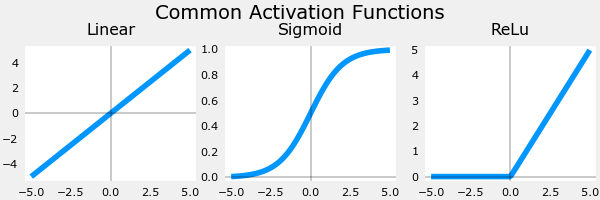

In [2]:
plt_act_trio()

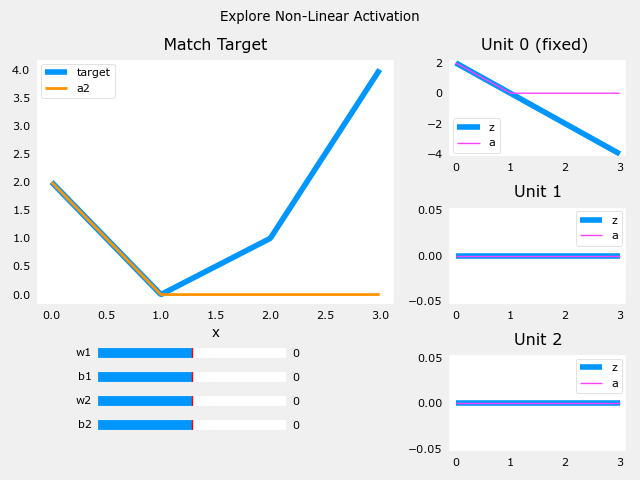

In [3]:
_ = plt_relu_ex()

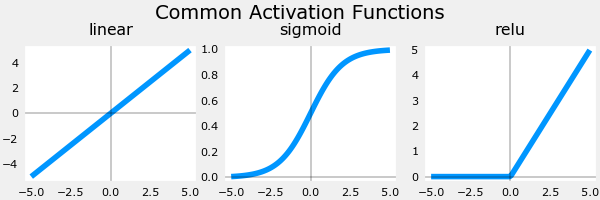

In [4]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

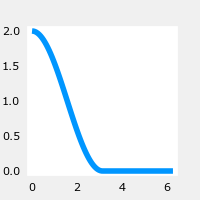

In [5]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [6]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation = "linear", input_shape = (1,), weights=[w10,b10])
z10 = d10(X.reshape(-1,1))
a10 = relu(z10)

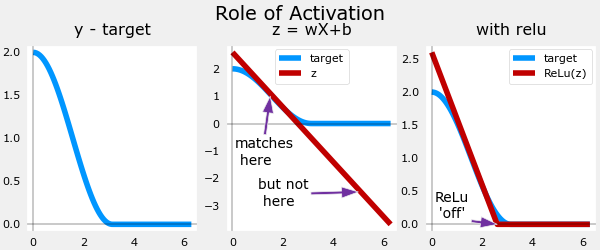

In [7]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)
X = np.linspace(0,2*np.pi, 100)

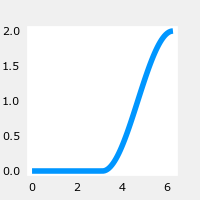

In [8]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot:title={'center':'y - target'}>,
       <AxesSubplot:title={'center':'z = wX+b'}>,
       <AxesSubplot:title={'center':'with relu'}>], dtype=object)

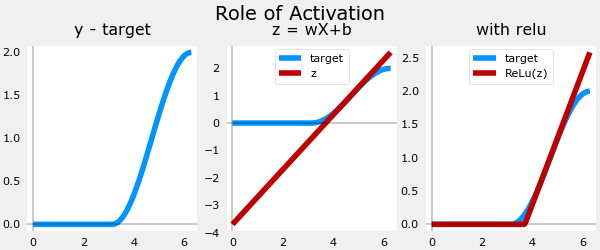

In [9]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

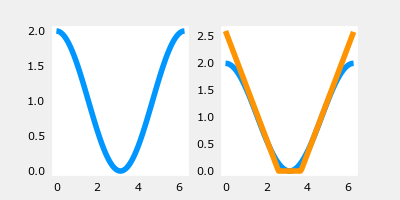

In [10]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

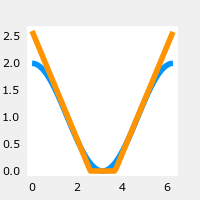

In [11]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [17]:
model = Sequential(
    [ 
        d10,
        tf.layers.Activation(activations.relu),
        d11,
        tf.layers.Activation(activations.relu),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

model.fit(
    X,y,
    epochs=1000
)

AttributeError: module 'tensorflow' has no attribute 'layers'

In [18]:
model = Sequential(
    [ 
        Dense(1,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 3.2178
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2218
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 1.5653
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 1.2855
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 1.2253
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 1.1720
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1225
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0719
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0288
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9888


In [19]:
yhat = model.predict(X)
yhat[0:5]

4/4 [==============================] - 0s 3ms/step


array([[0.34],
       [0.34],
       [0.34],
       [0.34],
       [0.34]], dtype=float32)

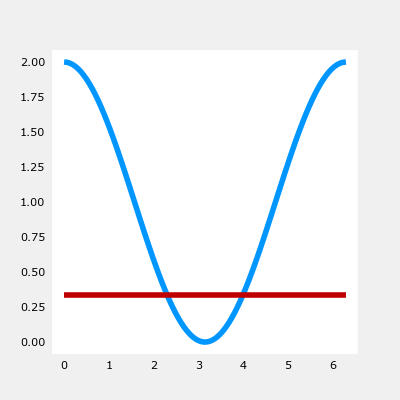

In [20]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [21]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [22]:
l1.get_weights()

[array([[-0.07]], dtype=float32), array([-0.19], dtype=float32)]

In [23]:
l2.get_weights()

[array([[-1.54]], dtype=float32), array([0.34], dtype=float32)]

In [24]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2456
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1855
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1239
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0586
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9990
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9401
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8882
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8383
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7941
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7519
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7162
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6823
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [25]:
l2.set_weights([w2,b2])

4/4 [==============================] - 0s 3ms/step


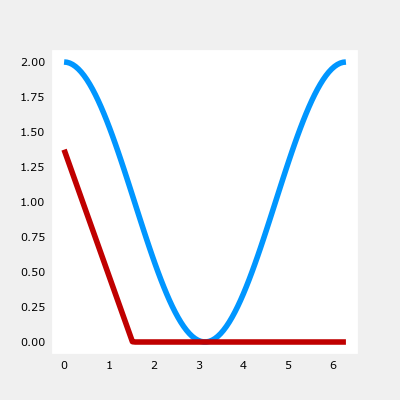

In [26]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [27]:
#2-D

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)

In [29]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')

<AxesSubplot:title={'center':'Multiclass Data'}, xlabel='x0', ylabel='x1'>

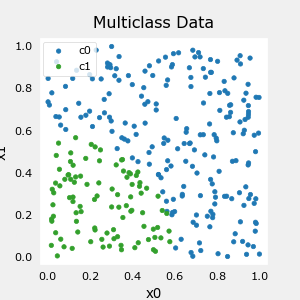

In [30]:
X = np.random.rand(300, 2)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [31]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=150
)

Epoch 1/150
10/10 [==============================] - 1s 4ms/step - loss: 0.1610
Epoch 2/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1539
Epoch 3/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1480
Epoch 4/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1411
Epoch 5/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1350
Epoch 6/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1292
Epoch 7/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1237
Epoch 8/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1177
Epoch 9/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1127
Epoch 10/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1085
Epoch 11/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1041
Epoch 12/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1003
Epoch 13/150
10/10 [=================

10/10 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 103/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 104/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 105/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 106/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 107/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 108/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 109/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 110/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 111/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 112/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 113/150
10/10 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 114/150
10/10 [=========

1250/1250 [==============================] - 3s 2ms/step


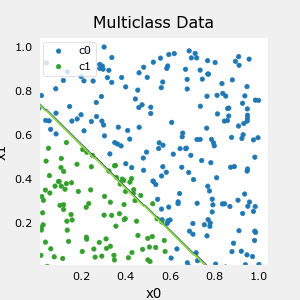

In [32]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [33]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

[[-1.13  2.47]
 [-0.99  2.53]] [ 0.   -1.35]
[[-1.37]
 [-5.24]] [2.88]


In [34]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

array([-1.75])

In [35]:
## Example